輸入立委臉書粉專內容及選舉政見資料

In [276]:
import pandas as pd
import jieba
from tqdm import tqdm
fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

以台東縣立委劉櫂豪為例，建立發文文字斷詞表

---



In [277]:
liu = fb[fb.page_name == "劉櫂豪"]
liu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26691,213939351983587_2199719290072240,213939351983587,劉櫂豪,政治人物,籲司法調查普悠瑪違失 劉櫂豪要求政府記取教訓,NaN,link,https://www.facebook.com/213939351983587/posts...,2019-01-15T08:30:49+0000,2019-01-15T16:30:49,http://yt1.piee.pw/E8MVM,20190111 籲司法調查普悠瑪違失 劉櫂豪盼政府記取教訓,NaN,456,0,0,0,0,0,25,7


In [278]:
liu[liu.created_time_taipei == max(liu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
27631,213939351983587_2853758061335023,213939351983587,劉櫂豪,政治人物,明天是關鍵時刻，每一票都非常重要，請大家一定要去投票！\n櫂豪拜託大家，台東人要支持台東子弟...,NaN,video,https://www.facebook.com/213939351983587/posts...,2020-01-10T13:59:27+0000,2020-01-10T21:59:27,https://www.facebook.com/ChaoHaoLiu/videos/627...,支持台東子弟,NaN,2106,0,0,0,0,0,50,13


In [279]:
liu[liu.created_time_taipei == min(liu.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26706,213939351983587_2182584481785721,213939351983587,劉櫂豪,政治人物,今天有四位長輩對蔡總統發表公開信。然而，民進黨由誰代表出馬2020總統選舉，有黨內機制可決定...,NaN,photo,https://www.facebook.com/213939351983587/posts...,2019-01-03T05:20:39+0000,2019-01-03T13:20:39,https://www.facebook.com/tsaiingwen/photos/a.3...,蔡英文 Tsai Ing-wen,我知道有幾位老前輩寫信給我，不過這個時刻，向世界表達台灣人的心聲更重要。昨天我回應中國國家主...,871,0,0,0,0,0,40,12


In [280]:
liu['new_date'] = pd.to_datetime(liu['created_time_taipei']).dt.date
liu['month_year'] = pd.to_datetime(liu['new_date']).dt.to_period('M')
liu.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26691,213939351983587_2199719290072240,213939351983587,劉櫂豪,政治人物,籲司法調查普悠瑪違失 劉櫂豪要求政府記取教訓,NaN,link,https://www.facebook.com/213939351983587/posts...,2019-01-15T08:30:49+0000,2019-01-15T16:30:49,http://yt1.piee.pw/E8MVM,20190111 籲司法調查普悠瑪違失 劉櫂豪盼政府記取教訓,NaN,456,0,0,0,0,0,25,7,2019-01-15,2019-01


In [281]:
liu = liu.sort_values(by=['like_count'])
liu

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26707,213939351983587_2832105373500292,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:27+0000,2020-01-01T13:42:27,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,7,0,0,0,0,0,0,0,2020-01-01,2020-01
26715,213939351983587_2832105053500324,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:17+0000,2020-01-01T13:42:17,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
26713,213939351983587_2832105353500294,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:27+0000,2020-01-01T13:42:27,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
26712,213939351983587_2831737200203776,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:15+0000,2020-01-01T10:24:15,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
26710,213939351983587_2831738216870341,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:42+0000,2020-01-01T10:24:42,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27552,213939351983587_2736778359699661,213939351983587,劉櫂豪,政治人物,早安！\n櫂豪前陣子來到好朋友魏紋書池上萬安的稻田一起割稻，挺台東青農！,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-20T23:12:00+0000,2019-11-21T07:12:00,https://www.facebook.com/ChaoHaoLiu/videos/946...,劉櫂豪挺台東青農,NaN,4900,0,0,0,0,0,86,65,2019-11-21,2019-11
27612,213939351983587_2763000857077411,213939351983587,劉櫂豪,政治人物,親愛的朋友，晚安，謝謝你💖\n\n今天櫂豪清早出門，參加南迴公路馬拉松，接著回到台東參加台東...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-01T15:44:04+0000,2019-12-01T23:44:04,https://www.facebook.com/ChaoHaoLiu/videos/869...,NaN,NaN,5297,0,0,0,0,0,129,73,2019-12-01,2019-12
27621,213939351983587_2757887770922053,213939351983587,劉櫂豪,政治人物,櫂豪是客家女婿，謝謝子煊是我最好的客語老師。上任立委以來，櫂豪積極爭取客家學堂的建設經費，努...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-30T12:30:01+0000,2019-11-30T20:30:01,https://www.facebook.com/ChaoHaoLiu/videos/803...,劉櫂豪客家文化代代相傳,NaN,5426,0,0,0,0,0,92,68,2019-11-30,2019-11
27598,213939351983587_2770920476285449,213939351983587,劉櫂豪,政治人物,櫂豪挺銅板美食！\n冷冷的下午，跟著櫂豪一起來吃台東style的下午茶小吃~\n也告訴櫂豪，...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-05T07:30:00+0000,2019-12-05T15:30:00,https://www.facebook.com/ChaoHaoLiu/videos/563...,櫂豪挺銅板美食,NaN,5661,0,0,0,0,0,83,103,2019-12-05,2019-12


In [282]:
liu.reset_index(inplace=True)
liu

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,link_url,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
0,26707,213939351983587_2832105373500292,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:27+0000,2020-01-01T13:42:27,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,7,0,0,0,0,0,0,0,2020-01-01,2020-01
1,26715,213939351983587_2832105053500324,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:17+0000,2020-01-01T13:42:17,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
2,26713,213939351983587_2832105353500294,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:27+0000,2020-01-01T13:42:27,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
3,26712,213939351983587_2831737200203776,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:15+0000,2020-01-01T10:24:15,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
4,26710,213939351983587_2831738216870341,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:42+0000,2020-01-01T10:24:42,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,動態時報相片,NaN,8,0,0,0,0,0,0,0,2020-01-01,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,27552,213939351983587_2736778359699661,213939351983587,劉櫂豪,政治人物,早安！\n櫂豪前陣子來到好朋友魏紋書池上萬安的稻田一起割稻，挺台東青農！,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-20T23:12:00+0000,2019-11-21T07:12:00,https://www.facebook.com/ChaoHaoLiu/videos/946...,劉櫂豪挺台東青農,NaN,4900,0,0,0,0,0,86,65,2019-11-21,2019-11
995,27612,213939351983587_2763000857077411,213939351983587,劉櫂豪,政治人物,親愛的朋友，晚安，謝謝你💖\n\n今天櫂豪清早出門，參加南迴公路馬拉松，接著回到台東參加台東...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-01T15:44:04+0000,2019-12-01T23:44:04,https://www.facebook.com/ChaoHaoLiu/videos/869...,NaN,NaN,5297,0,0,0,0,0,129,73,2019-12-01,2019-12
996,27621,213939351983587_2757887770922053,213939351983587,劉櫂豪,政治人物,櫂豪是客家女婿，謝謝子煊是我最好的客語老師。上任立委以來，櫂豪積極爭取客家學堂的建設經費，努...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-30T12:30:01+0000,2019-11-30T20:30:01,https://www.facebook.com/ChaoHaoLiu/videos/803...,劉櫂豪客家文化代代相傳,NaN,5426,0,0,0,0,0,92,68,2019-11-30,2019-11
997,27598,213939351983587_2770920476285449,213939351983587,劉櫂豪,政治人物,櫂豪挺銅板美食！\n冷冷的下午，跟著櫂豪一起來吃台東style的下午茶小吃~\n也告訴櫂豪，...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-05T07:30:00+0000,2019-12-05T15:30:00,https://www.facebook.com/ChaoHaoLiu/videos/563...,櫂豪挺銅板美食,NaN,5661,0,0,0,0,0,83,103,2019-12-05,2019-12


結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [283]:
doc_names = range(len(liu)) #劉櫂豪有幾篇文章
doc_names

range(0, 999)

In [284]:
import numpy as np
liu = liu.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(liu['message'])
liu_docs = pd.DataFrame(columns=['jieba_results'])
liu_docs['jieba_results'] = liu_docs['jieba_results'].astype('str')

In [285]:
words = jieba.lcut(text_list[0], cut_all = False)
print(words)

['返鄉貼紙', '熱門叫座', ' ', '歡迎索取', ' ', '劉櫂豪', '元旦', '升旗典禮', '呼籲', '青年', '返鄉投票', '\n', '\n', '劉櫂豪', '立委', '服務處', '近日', '來', '了許', '多年', '輕人', '、', '外縣', '市', '的', '朋友', '或者', '不', '熟悉', '的', '鄉親', '特地', '專程', '來', '索取', '「', '返鄉投票', '」', '貼紙', '，', '由', '於', '民進', '黨', '青年', '部針', '對', '大', '返鄉', '計畫', '，', '推出', '10', '款活', '潑', '又', '有', '創意', '的', '返鄉貼紙', '，', '大受', '青年', '好評', '，', '而', '劉櫂豪', '服務處', '因為', '青年', '部', '全力', '相挺', '，', '10', '款', '貼紙', '一次', '到位', '，', '全台僅', '有', '，', '許', '多年', '輕人', '或是', '委', '託', '父母', '朋友', '特地', '來', '索取', '，', '讓', '劉櫂豪', '服務處', '增添', '了', '許多', '人氣', '，', '也', '感受', '到', '台東', '子弟', '返鄉投票', '的', '意願', '。', '\n', '\n', '今天', '是', '2020', '年', '的', '元旦', '，', '新', '的', '一年', '許多人', '都', '有', '新', '的', '展望', '，', '劉櫂豪', '委員', '早上', '七點', '特地', '前往', '鐵花村', '參加縣', '政府', '舉辦', '的', '升旗典禮', '，', '祈福', '新', '的', '一年', '台灣', '能夠', '守護', '民主', '的', '價值', '，', '台東', '的', '發展', '能夠', '一年', '比', '一年', '好', '，', '隨後', '劉櫂豪', '立即', '前往', '東海岸', '，', '來', '到', 

In [286]:
words = jieba.lcut(text_list[998], cut_all = False)
print(words)

['那', '一年', '，', '我', '追', '的', '女孩', '😘', '\n', '\n', '櫂豪', '政', '大', '法律系', '的', '畢業', '典禮', '上', '🎓', ' ', '子煊', '送花', '給我', '🌹', ' ', '青春', '的', '我們', '戀愛', '❤', '️', '\n', '\n', '今天', '七夕', '情人', '節', '，', '你', '有', '收到', '我', '和', '子煊', '的', '青春', '照', '嗎', '？', '如果', '沒有', '，', '趕快', '加', '我', '的', 'line', '哦', '😄', '\n', '\n', '劉櫂豪', ' ', 'Line', ' ', '&', ' ', 'IG', '\n', 'Line', '：', ' ', 'https', ':', '/', '/', 'tinyurl', '.', 'com', '/', 'y59pyy2e', '\n', 'Line', ' ', 'ID', ' ', '帳號', '：', '@', 'pss4210h', '\n', 'IG', '：', 'ahao', '_', 'liu']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [287]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    liu_docs = liu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [288]:
liu_docs

,jieba_results
0,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...
1,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...
2,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...
3,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...
4,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...
...,...
994,早安 櫂豪 前陣子 來 到 好 朋友 魏紋書 池上 萬安 的 稻田 一起 割稻 挺台 東青農 ！
995,親愛的 朋友 晚安 謝謝 你 💖 今天 櫂豪 清早 出門 參加 南迴公路 馬拉松 接著 回...
996,櫂豪 是 客家 女婿 謝謝 子煊 是 我 最好 的 客語 老師 。 上任 立委 以來 櫂豪...
997,櫂豪 挺 銅板美食 冷冷的 下午 跟 著 櫂豪 一起 來 吃 台東 的 下午茶 小吃 ~...


In [289]:
liu['jieba_results'] = liu_docs
liu_post = liu[['new_date','message','jieba_results','like_count']]
liu_post

,new_date,message,jieba_results,like_count
0,2020-01-01,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...,7
1,2020-01-01,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...,8
2,2020-01-01,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...,8
3,2020-01-01,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...,8
4,2020-01-01,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...,8
...,...,...,...,...
994,2019-11-21,早安！\n櫂豪前陣子來到好朋友魏紋書池上萬安的稻田一起割稻，挺台東青農！,早安 櫂豪 前陣子 來 到 好 朋友 魏紋書 池上 萬安 的 稻田 一起 割稻 挺台 東青農 ！,4900
995,2019-12-01,親愛的朋友，晚安，謝謝你💖\n\n今天櫂豪清早出門，參加南迴公路馬拉松，接著回到台東參加台東...,親愛的 朋友 晚安 謝謝 你 💖 今天 櫂豪 清早 出門 參加 南迴公路 馬拉松 接著 回...,5297
996,2019-11-30,櫂豪是客家女婿，謝謝子煊是我最好的客語老師。上任立委以來，櫂豪積極爭取客家學堂的建設經費，努...,櫂豪 是 客家 女婿 謝謝 子煊 是 我 最好 的 客語 老師 。 上任 立委 以來 櫂豪...,5426
997,2019-12-05,櫂豪挺銅板美食！\n冷冷的下午，跟著櫂豪一起來吃台東style的下午茶小吃~\n也告訴櫂豪，...,櫂豪 挺 銅板美食 冷冷的 下午 跟 著 櫂豪 一起 來 吃 台東 的 下午茶 小吃 ~...,5661


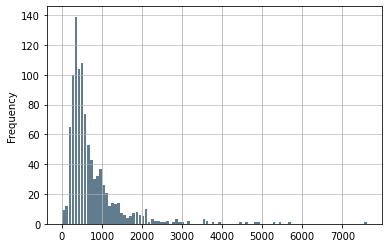

In [290]:
commutes = liu_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [291]:
temp = liu_post[(liu_post['like_count'] <= 1000) & (liu_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
486,2019-08-04,大客車駕駛擴大徵才就業安薪方案招募活動\n\n#劉櫂豪爭取新增台東場次\n#我付費你學車駕駛...,大客車 駕駛 擴大徵才 就 業安薪 方案 招募 活動 # 劉櫂豪 爭取 新增 台東場 次 ...,501
487,2019-07-12,劉櫂豪也有line貼圖了！歡迎大家下載「好豪愛我」貼圖，跟櫂豪一起說你好你好\n\n下載網址...,劉櫂豪 也 有 貼圖 了 歡迎 大家 下載 好 豪愛我 貼圖 跟 櫂豪 一起 說 你好 ...,501
488,2019-03-16,東區農到板農辦枇杷促銷活動 劉櫂豪前往關心,東區農 到 板農 辦 枇杷 促銷 活動 劉櫂豪 前往 關心,501
489,2019-07-11,劉櫂豪爭取綠島生活圈道路經費補助4.09億元,劉櫂豪 爭取 綠島 生活圈 道路 經費 補助 . 億元,501
490,2019-06-14,"劉櫂豪爭取3,240萬元建設南迴線各車站無障礙設施 \n今年2月起陸續完工啟用","劉櫂豪 爭取 , 萬元 建設 南迴線 各 車站 無障礙 設施 今年 月 起 ...",502
...,...,...,...,...
802,2019-01-10,劉櫂豪：兩岸議題將成為2020台灣總統選戰主軸,劉櫂豪 兩岸 議題 將成 為 台灣 總統 選戰主軸,987
803,2019-07-10,"🚃劉櫂豪爭取3,000萬元 興建南迴各車站電梯無障礙設施\n\n🛤過去在南迴線火車站，行動不...","🚃 劉櫂豪 爭取 , 萬元 興建 南迴 各 車站 電梯 無障礙 設施 🛤 過去 在...",988
804,2019-08-05,劉櫂豪邀請蔡英文總統太麻里釋迦園農業座談\n\n上週末（3日）蔡英文總統來到台東，在劉櫂豪立...,劉櫂豪 邀請 蔡英文 總統 太麻里 釋迦園 農業座談 上 週末 日 蔡英文 總統 來 到...,991
805,2019-10-25,【🎥直播LIVE】\n為了要謝謝大家的踴躍支持，讓櫂豪的「來去台東」清唱榮獲歌唱比賽第三名\...,🎥 直播 為 了 要 謝謝 大家 的 踴躍 支持 讓 櫂豪 的 來去台東 清唱 榮獲 歌...,992


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [292]:
corpus = temp['jieba_results'].values.tolist()

In [293]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [294]:
#使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['行程', '我們', '推薦', '同心', '邀請', '快樂', '一起', '大家', '母親節', '台東']
TOP 10 WORDS PER TOPIC #1
['謝謝', '一起', '早安', '台東', '列次', '大家', '您好', '優先', '活動', '劉櫂豪']
TOP 10 WORDS PER TOPIC #2
['發電機', '貼圖', '下載', '你好', '劉櫂豪', '台鐵局', '台東', '枇杷', '承租', '協和米']
TOP 10 WORDS PER TOPIC #3
['觀光', '早安', '教育', '辦理', '成功鎮', '池上', '台東', '客家', '活動', '劉櫂豪']
TOP 10 WORDS PER TOPIC #4
['設施', '台東', '計畫', '協助', '萬元', '道路', '補助', '爭取', '改善', '劉櫂豪']
TOP 10 WORDS PER TOPIC #5
['歡迎', '朋友', '下午茶', '開心', '一天', '台東', '劉櫂豪', '大家', '早安', '櫂豪']
TOP 10 WORDS PER TOPIC #6
['邀請', '美好', '櫂豪', '一起', '台東', '一位', '早餐', '朋友', '大家', '早安']
TOP 10 WORDS PER TOPIC #7
['咖啡', '姐妹', '朋友', '櫂豪', '早安', '假日', '愉快', '劉櫂豪', '大家', '台東']


In [295]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['年度', '一位', '我們', '東河', '大家', '台東', '成功', '朋友', '劉櫂豪', '早安']
TOP 10 WORDS PER TOPIC #1
['公路', '駕駛', '謝謝', '補助', '活動', '朋友', '櫂豪', '台東', '大家', '劉櫂豪']
TOP 10 WORDS PER TOPIC #2
['協助', '日本', '活動', '水利', '地區', '劉櫂豪', '農會', '太麻里', '咖啡', '台東']
TOP 10 WORDS PER TOPIC #3
['萬元', '計畫', '池上', '活動', '爭取', '大家', '客家', '補助', '台東', '劉櫂豪']
TOP 10 WORDS PER TOPIC #4
['設施', '大家', '醫院', '南迴線', '月台', '辦理', '改善', '車站', '台東', '劉櫂豪']
TOP 10 WORDS PER TOPIC #5
['辦理', '通車', '爭取', '觀光局', '萬元', '觀光', '改善', '活動', '劉櫂豪', '台東']
TOP 10 WORDS PER TOPIC #6
['設施', '辦理', '補助', '協助', '計畫', '台東', '爭取', '道路', '改善', '劉櫂豪']
TOP 10 WORDS PER TOPIC #7
['通車', '拓寬工程', '計畫', '督促', '完成', '工程', '南迴公路', '大家', '台東', '劉櫂豪']


In [297]:
politics_liu = politics[politics.姓名 == "劉櫂豪"].政見.to_string()
politics_liu = re.sub(re_punctuation, "", politics_liu)
politics_liu = re.sub(r'[0-9]','',politics_liu)
politics_liu = re.sub(r'[a-zA-Z]','',politics_liu)
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_liu, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '一', '、', '持續', '配合', '縣', '政府', '、', '議會', '、', '鄉鎮', '市公所', '、', '代表', '會', '向', '中央', '爭取', '年度', '施政', '計畫', '預算', '補助', '。', '二', '、', '問政', '、', '選民服', '...']


In [298]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['問政', '補助', '選民服', '代表', '市公所', '中央', '計畫', '預算', '持續', '議會']
TOP 10 WORDS PER TOPIC #1
['年度', '市公所', '選民服', '代表', '中央', '計畫', '持續', '預算', '問政', '鄉鎮']
TOP 10 WORDS PER TOPIC #2
['問政', '年度', '補助', '中央', '計畫', '持續', '預算', '市公所', '代表', '選民服']
TOP 10 WORDS PER TOPIC #3
['補助', '問政', '年度', '選民服', '代表', '市公所', '預算', '持續', '中央', '計畫']
TOP 10 WORDS PER TOPIC #4
['問政', '選民服', '代表', '市公所', '中央', '計畫', '持續', '預算', '補助', '年度']
TOP 10 WORDS PER TOPIC #5
['補助', '配合', '選民服', '代表', '市公所', '中央', '計畫', '預算', '持續', '政府']
TOP 10 WORDS PER TOPIC #6
['年度', '問政', '選民服', '代表', '市公所', '中央', '計畫', '持續', '預算', '爭取']
TOP 10 WORDS PER TOPIC #7
['補助', '選民服', '代表', '市公所', '中央', '計畫', '持續', '預算', '配合', '施政']
